## Museum site planning

### a)

- Decision variables are the radius of the museum and the coordinates of the museum(location, center)
- Constraints are the 5 lines of the site, the circle should be staying inside the site with 50 clearance
- Objective of the problem is to maximize the minimum radius of the museum

### b)

In [108]:
using JuMP, Clp, LinearAlgebra

A=[0 1;
    -1 0;
    0 -1;
    2/3 1;
    3 -1]

b=[450;
-50;
-50;
(-50*sqrt(13)+2100)/3;
-(50*sqrt(10)-1500)]

m2 = Model(with_optimizer(Clp.Optimizer))
### Variables
@variable(m2, r >= 0)           # radius of the circle
@variable(m2, x[1:2]>=0)        # coordinates of center

### Constraints
# Implementing constraints as a for loop that iterates throught rows of A
for i = 1:size(A,1)
    @constraint(m2, A[i,:]'*x + r*norm(A[i,:]) <= b[i])
end

### Objective
@objective(m2, Max, r)     # maximize radius of the sphere

println(m2)
optimize!(m2)
center = value.(x)
radius = value(r)

println("Our solution is ", termination_status(m2))
println("The coordinates of the circle: ", center)
println("The largest possible radius is: ", radius)

Max r
Subject to
 r + x[2] ≤ 450.0
 r - x[1] ≤ -50.0
 r - x[2] ≤ -50.0
 1.2018504251546631 r + 0.6666666666666666 x[1] + x[2] ≤ 639.9074787422668
 3.1622776601683795 r + 3 x[1] - x[2] ≤ 1341.886116991581
 r ≥ 0.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0

Our solution is OPTIMAL
The coordinates of the circle: [244.02852679380186, 244.02852679380183]
The largest possible radius is: 194.02852679380183
Coin0506I Presolve 5 (0) rows, 3 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 100 (2) Dual inf 0.9999999 (1)
Clp0006I 4  Obj 194.02853
Clp0000I Optimal - objective value 194.02853
Clp0032I Optimal objective 194.0285268 - 4 iterations time 0.002


## c)

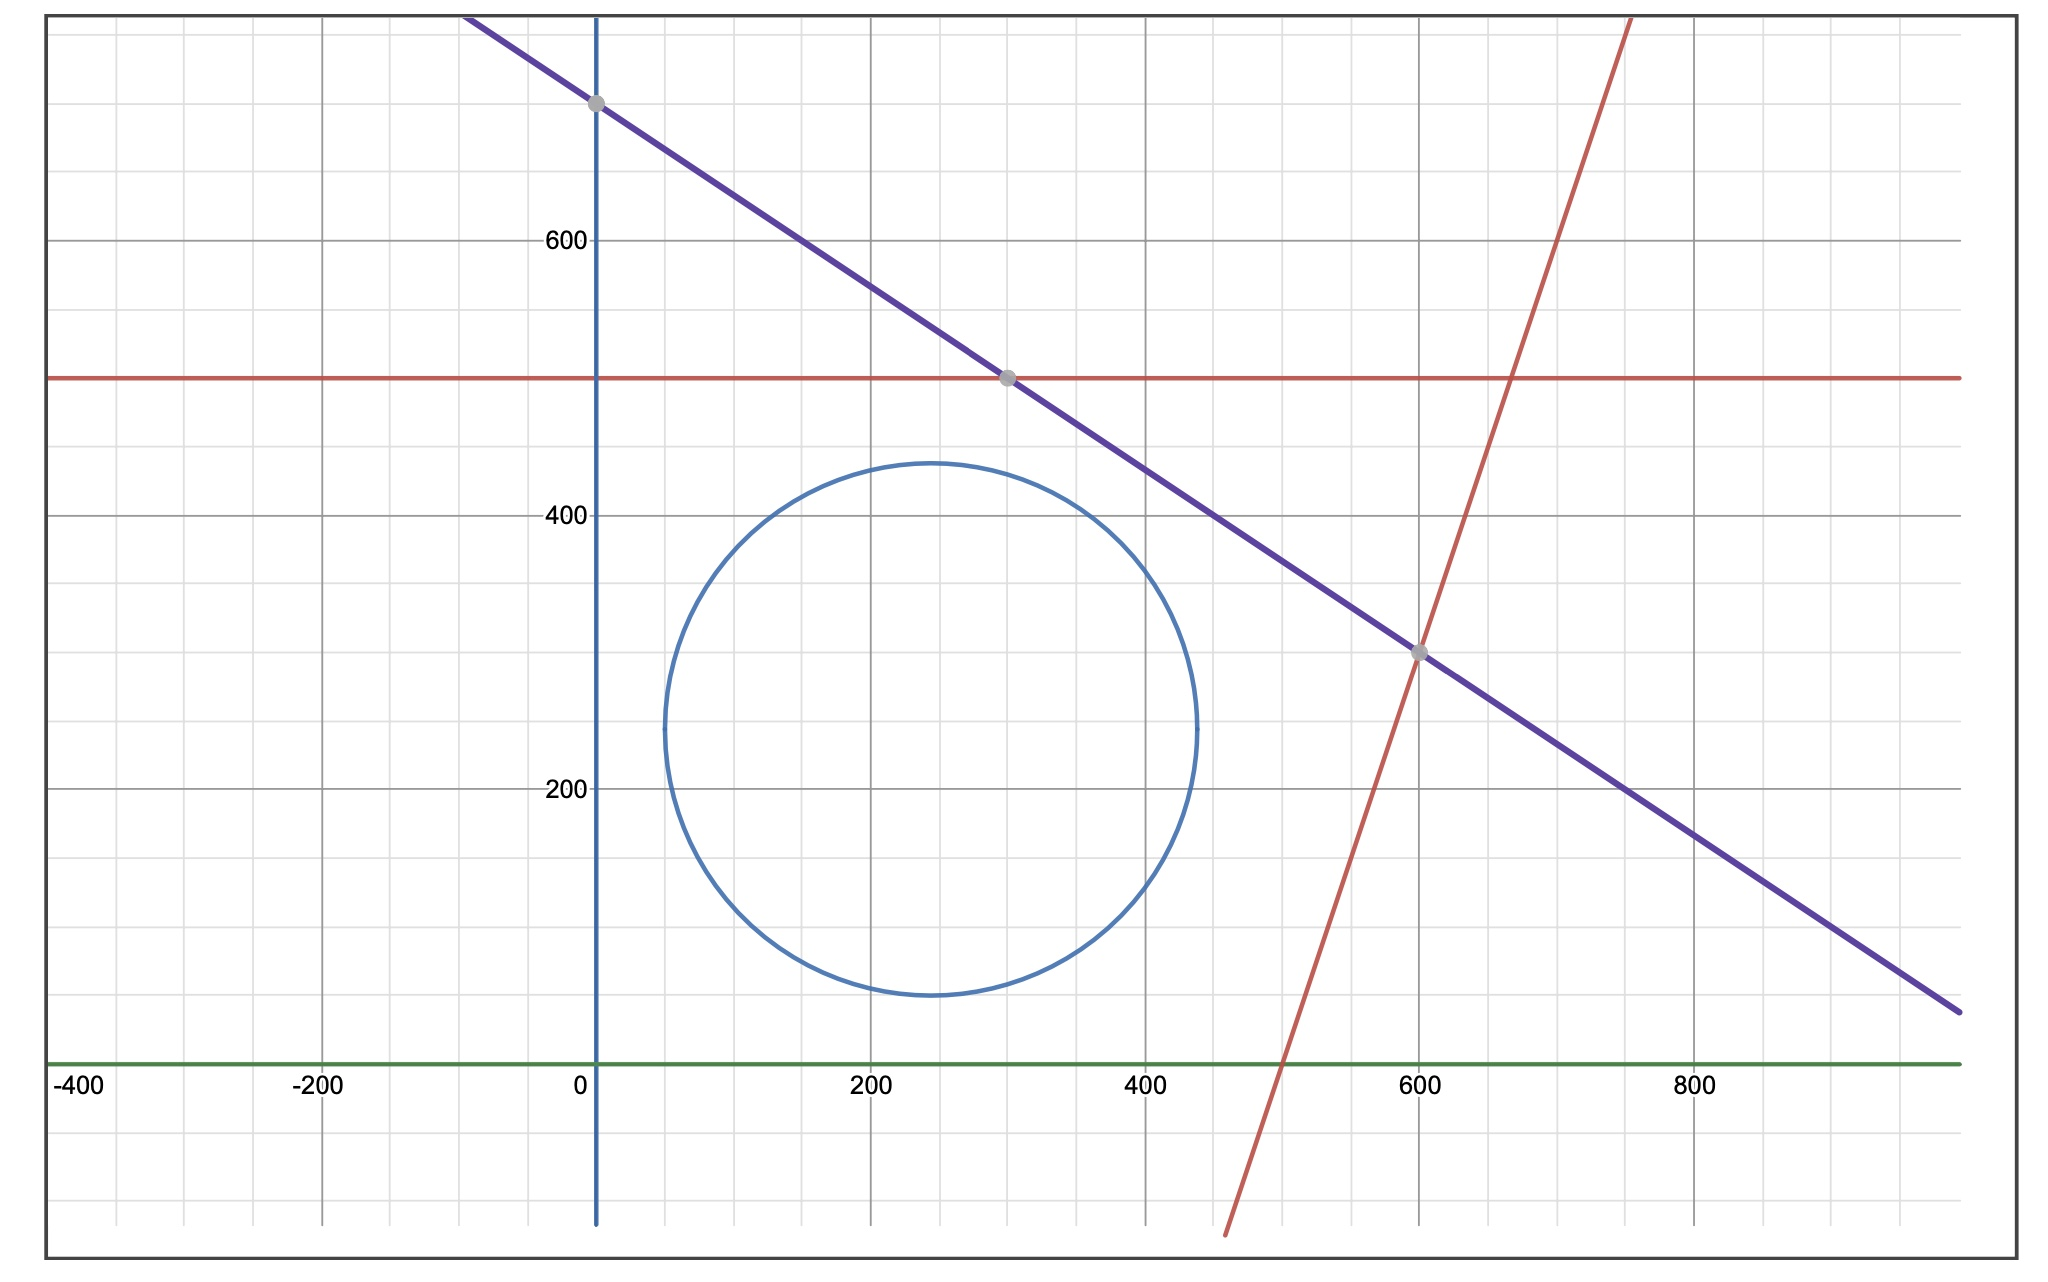

## Data for Doodle Scheduling problem

In [61]:
using Pkg
using JuMP, Clp, LinearAlgebra,NamedArrays

availability =
  [ 1 1 0 0 0 0 0 0 0 0 1 1 1
    1 1 1 0 0 0 0 0 0 1 1 0 0
    0 0 1 1 0 0 0 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 0 1 1 0 1 1 1 1
    0 0 0 1 1 1 1 1 1 1 1 1 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 1 1 0 0 0 0 0 0
    0 0 0 0 0 0 0 1 1 0 0 0 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    1 1 0 0 0 1 1 1 1 0 0 1 1
    1 1 1 0 1 1 0 0 0 0 0 1 1
    0 1 1 1 0 0 0 0 0 0 0 0 0
    0 1 1 0 0 0 0 1 1 1 0 0 0
    1 1 0 0 1 1 0 0 0 0 0 0 0 ]

TIMES = collect(1:13)
NAMES = [:Mirjam,:Matt,:Manuel,:Luca,:Jule,:Michael,:Malte,:Chris,:Spyros,:Florian,:Josep,:Joel,:Tom,:Daniel,:Christian,:Anne ]
TIMESTR = ["10:00","10:20","10:40","11:00","11:20","11:40","lunch","1:00","1:20","1:40","2:00","2:20","2:40"]

# Creating a NamedArray of the availability data
times = NamedArray( availability, (NAMES,TIMES), ("NAME","TIME"))

# With a NamedArray, it is possible to use symbols as indices (although you don't have to use this)
# For example, it is possible to write

println(times[:Luca,1])

# or

println(sum(times[i,1] for i in NAMES))



0
5


## a)

- Decision variables are the employees and the time slots (A feasible interview schedule)
- Constraints are "never meets anyone more than once", "The first 20-minute slot at 10 am should include two employees (Mirjam or Matt)" and  "There is also a one-hour time slot in the middle of the day where 3 employees take the candidate out for lunch"
- Parameters: TIMES, NAMES

## b)

In [64]:

m = Model(with_optimizer(Clp.Optimizer))

@variable(m, x[NAMES,TIMES] >= 0)

#Except 10:00 and lunch exactly one employee at a time
@constraint(m, a[j in [2:6; 8:13]], sum(x[i,j]*times[i,j] for i in NAMES) ==1 )

#Each employee charge one interview
@constraint(m, b[i in NAMES], sum(x[i,j]*times[i,j] for j in TIMES) == 1 ) 

# 10:00: Mirjam or Matt
@constraint(m, sum(x[i,1]*times[i,1] for i in NAMES[1:2]) == 2 ) 


# lunch :3 people
@constraint(m, sum(x[i,7]*times[i,7] for i in NAMES) == 3 ) 


@objective(m, Min, sum(x[i,j] for i in NAMES, j in TIMES) )


optimize!(m)
println(termination_status(m))

OPTIMAL
Coin0506I Presolve 20 (-9) rows, 49 (-159) columns and 95 (-58) elements
Clp0006I 0  Obj 6 Primal inf 20.19998 (20)
Clp0006I 30  Obj 16
Clp0000I Optimal - objective value 16
Coin0511I After Postsolve, objective 16, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 16 - 30 iterations time 0.002, Presolve 0.00


## c)

In [63]:
assignment = NamedArray( [ (value.(x[i,j])) for i in NAMES, j in TIMES ], (NAMES, TIMESTR), ("NAMES","TIMES"))
@show assignment;

assignment = 16×13 Named Matrix{Float64}
NAMES ╲ TIMES │ 10:00  10:20  10:40  11:00  11:20  11:40  lunch   1:00   1:20   1:40   2:00   2:20   2:40
──────────────┼──────────────────────────────────────────────────────────────────────────────────────────
:Mirjam       │   1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
:Matt         │   1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
:Manuel       │   0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
:Luca         │   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0
:Jule         │   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0
:Michael      │   0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
:Malte        │   0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0
:Chri